In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [3]:
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


## Data Preprocessing

In [4]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [5]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

In [6]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

In [7]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,rent_approval_year,rent_approval_month
0,2021-09-01,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,2021,2021.750000
1,2022-05-01,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,2022,2022.416667
2,2022-10-01,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,2022,2022.833333
3,2021-08-01,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,2021,2021.666667
4,2022-11-01,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,2022,2022.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09-01,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200,2021,2021.750000
59996,2023-04-01,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100,2023,2023.333333
59997,2022-06-01,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250,2022,2022.500000
59998,2023-01-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700,2023,2023.083333


In [8]:
df_train.describe()

,rent_approval_date,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent,rent_approval_year,rent_approval_month
count,60000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000
mean,2022-03-20 00:57:57.599999744,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333,2021.813050,2022.299508
min,2021-01-01 00:00:00,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000,2021.000000,2021.083333
25%,2021-08-01 00:00:00,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000,2021.000000,2021.666667
50%,2022-03-01 00:00:00,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000,2022.000000,2022.250000
75%,2022-12-01 00:00:00,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000,2022.000000,2023.000000
max,2023-07-01 00:00:00,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000,2023.000000,2023.583333
std,NaN,24.082642,12.141435,0.042505,0.071627,0.0,714.910468,0.780006,0.758707


KeyboardInterrupt: 

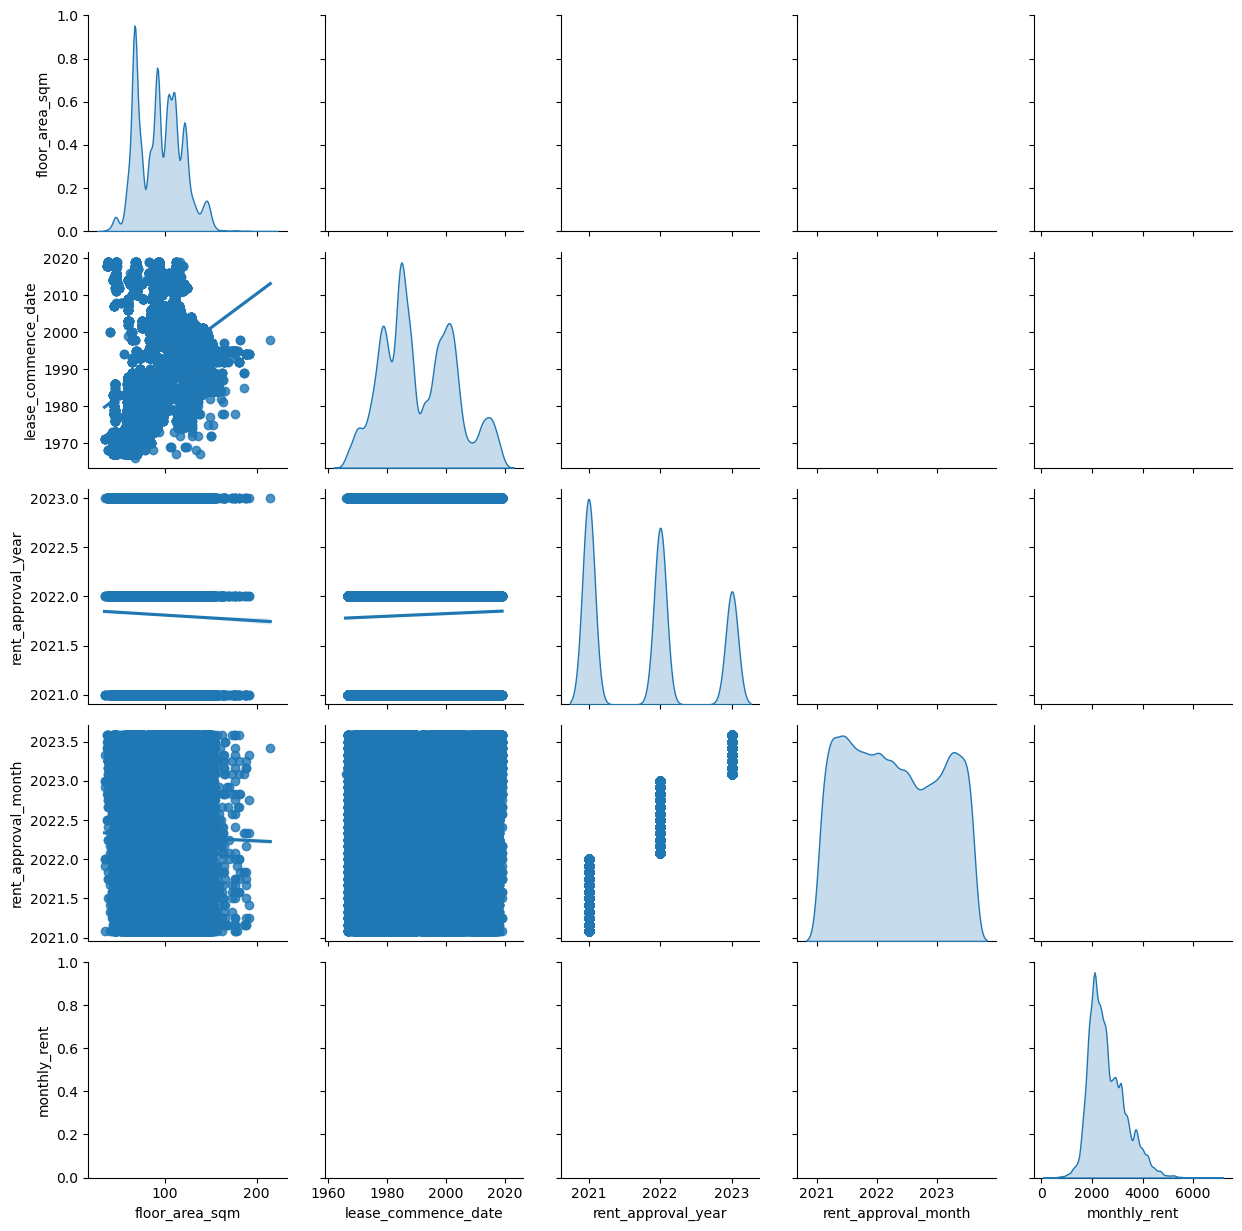

In [9]:
#draw corr distribution plot
sns.pairplot(df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'monthly_rent']], diag_kind='kde', kind='reg')


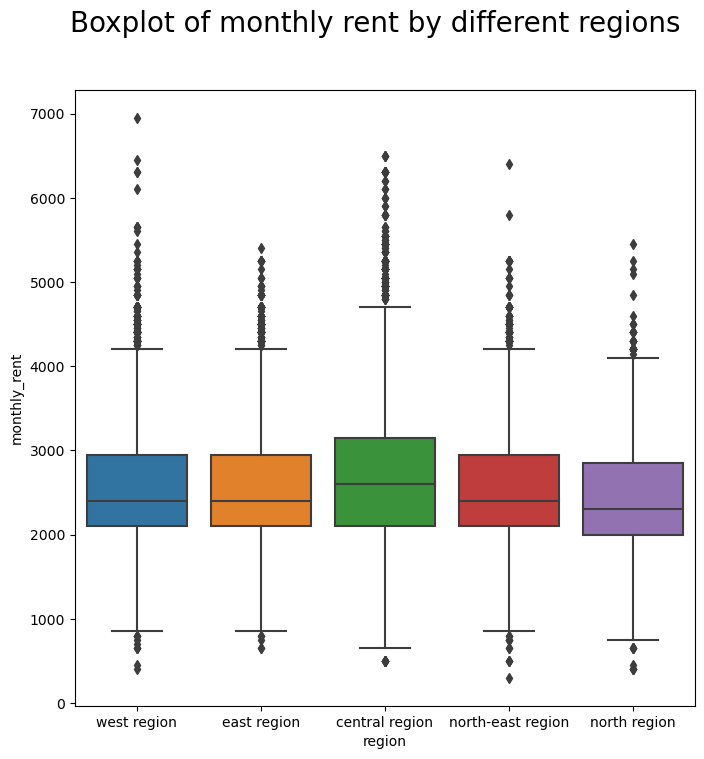

In [16]:
fig = plt.figure(figsize=(8, 8))
#sns.boxplot(x='town', y='monthly_rent', data=df_train)
#sns.boxplot(x='flat_type', y='monthly_rent', data=df_train)
#sns.boxplot(x='flat_model', y='monthly_rent', data=df_train)
#sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train)
#sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
#set title
fig.suptitle('Boxplot of monthly rent by different regions', fontsize=20)
fig.savefig('boxplot_regions.png')

In [ ]:
labels = df_train.columns
labels

Index(['rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'furnished', 'lease_commence_date',
       'latitude', 'longitude', 'elevation', 'subzone', 'planning_area',
       'region', 'monthly_rent', 'rent_approval_year', 'rent_approval_month'],
      dtype='object')

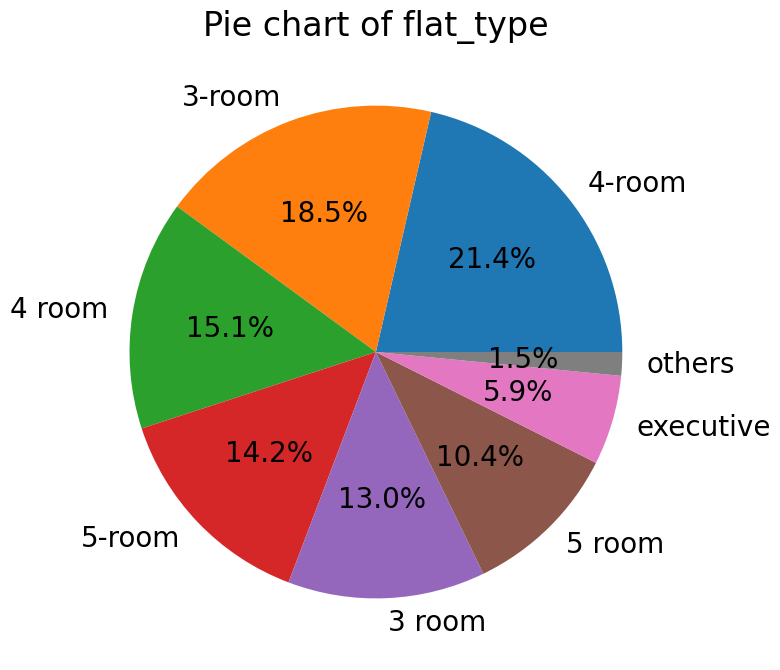

In [ ]:
#pie chart for categorical data
plt.rcParams['font.size'] = 20
lab = 'flat_type'
plt.figure(figsize=(8, 8))
counts = df_train[lab].value_counts()
labels = df_train[lab].value_counts().index
#set others with < 5% to 'others'
the = 0.02
others = counts[counts/counts.sum() <= the].sum()
counts = counts[counts/counts.sum() > the]
if others > 0:
    counts['others'] = others
labels = counts.index

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pie chart of ' + lab)
plt.savefig('pie_' + lab + '.png')



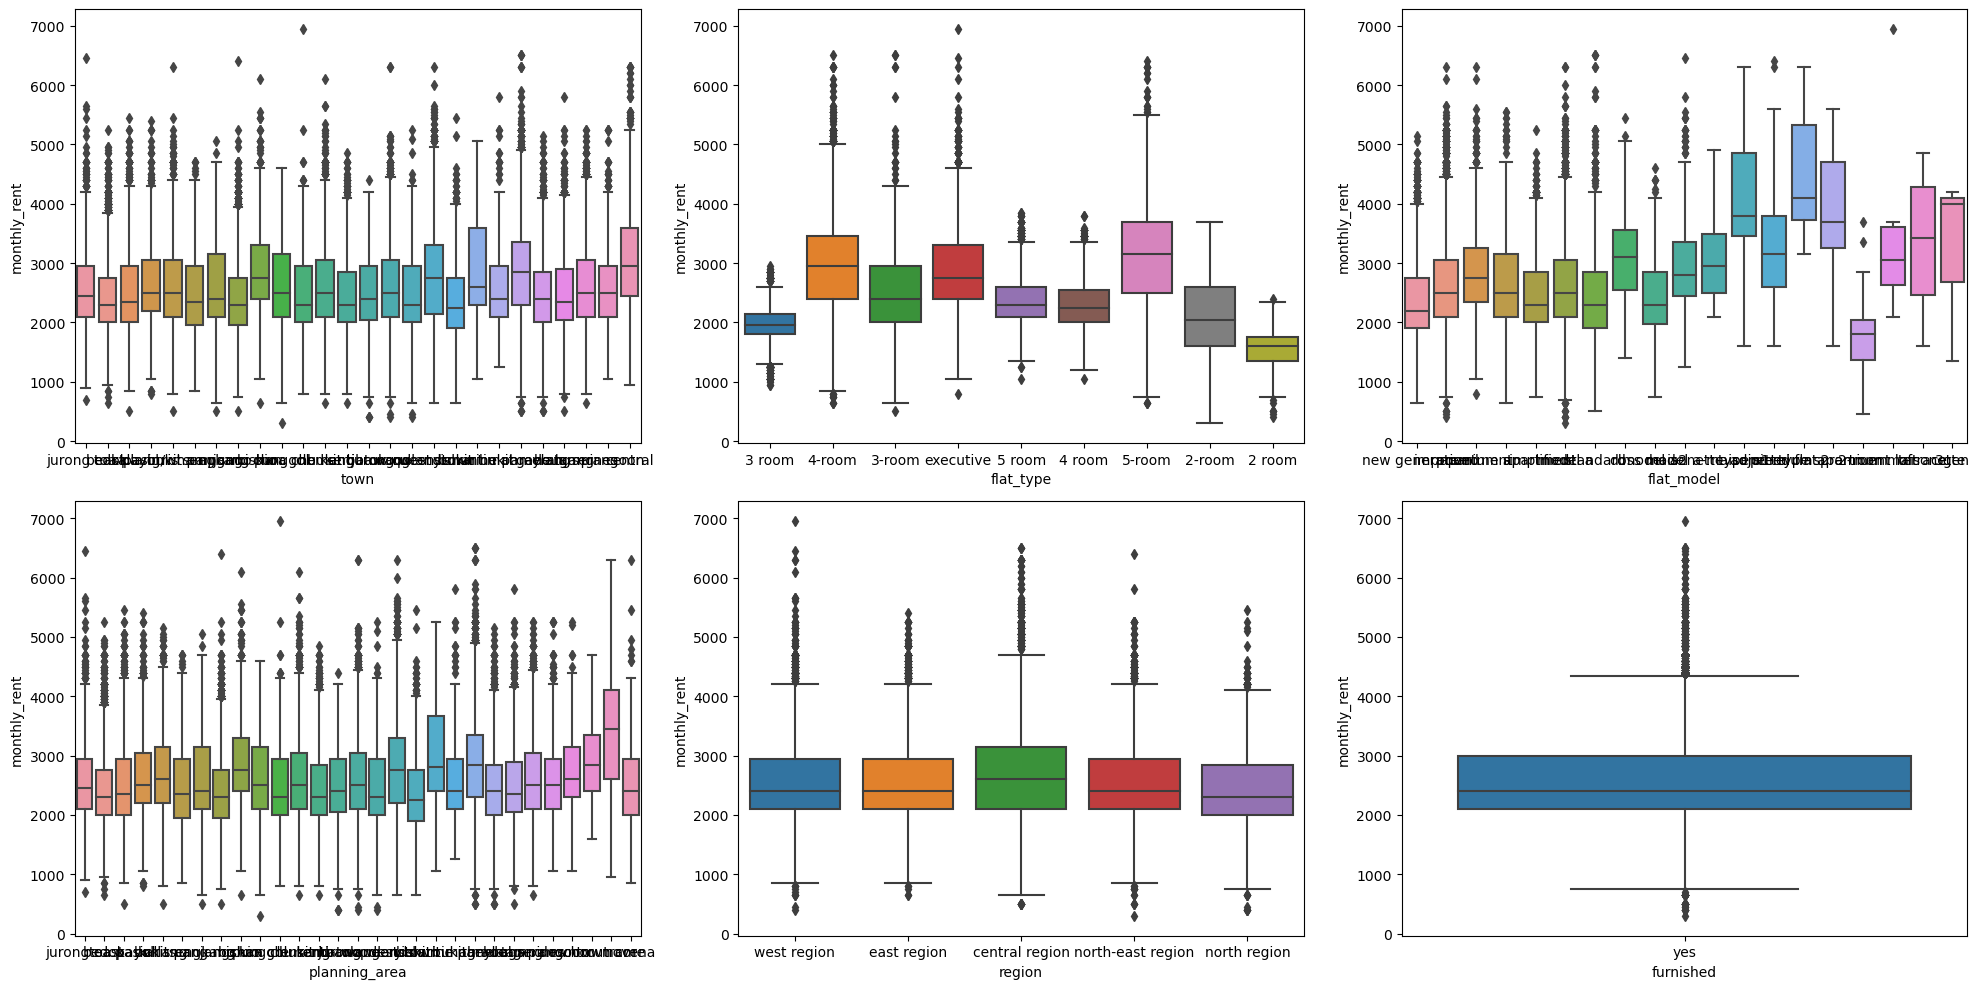

In [ ]:
#draw distribution for categorical variables and monthly rent
#town	street_name	flat_type	flat_model	subzone	planning_area	region
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()



In [ ]:
print(df_train['town'].unique())
print(df_train['flat_type'].unique())
print(df_train['flat_model'].unique())

['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
['3 room' '4-room' '3-room' 'executive' '5 room' '4 room' '5-room'
 '2-room' '2 room']
['new generation' 'improved' 'apartment' 'premium apartment' 'simplified'
 'model a' 'standard' 'dbss' 'model a2' 'maisonette' 'model a-maisonette'
 'type s1' 'adjoined flat' 'type s2' 'premium apartment loft' '2-room'
 'premium maisonette' 'terrace' '3gen']


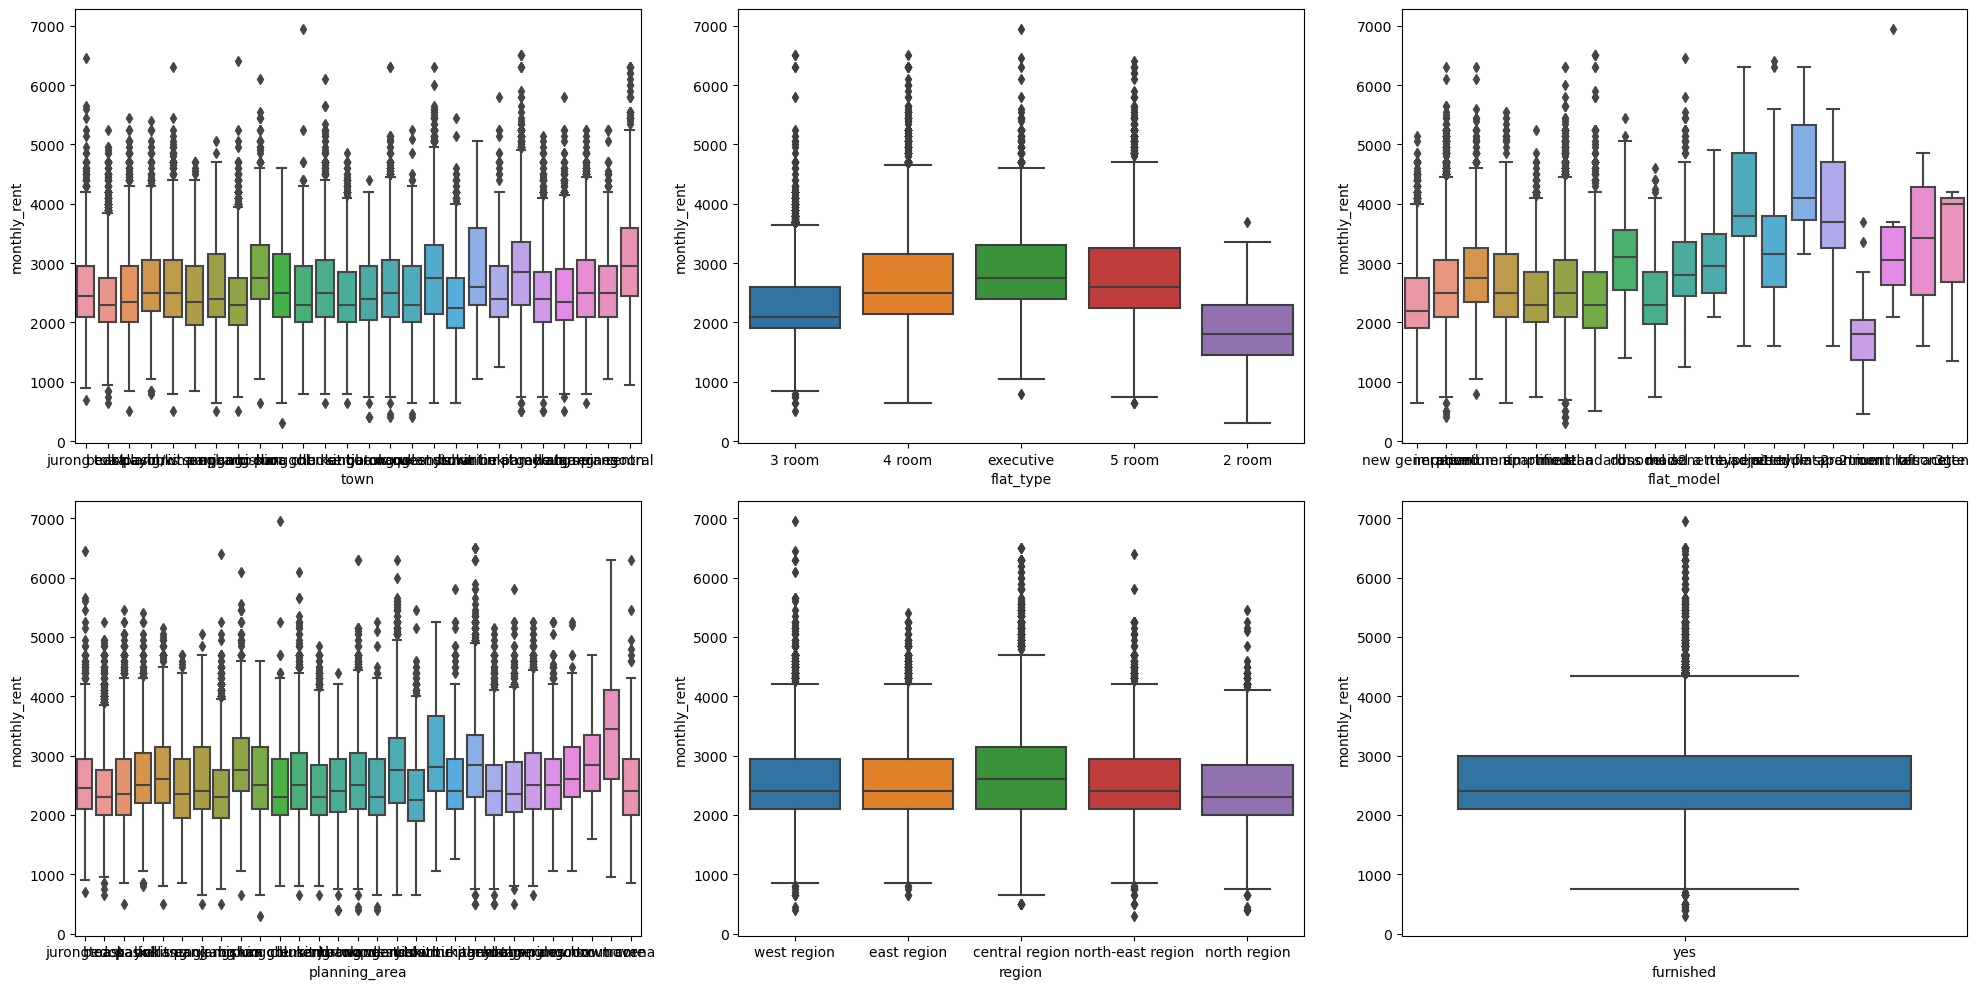

In [ ]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')
df_train['flat_model'] = df_train['flat_model'].str.replace('-', ' ')

#draw distribution for categorical variables and monthly rent
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()


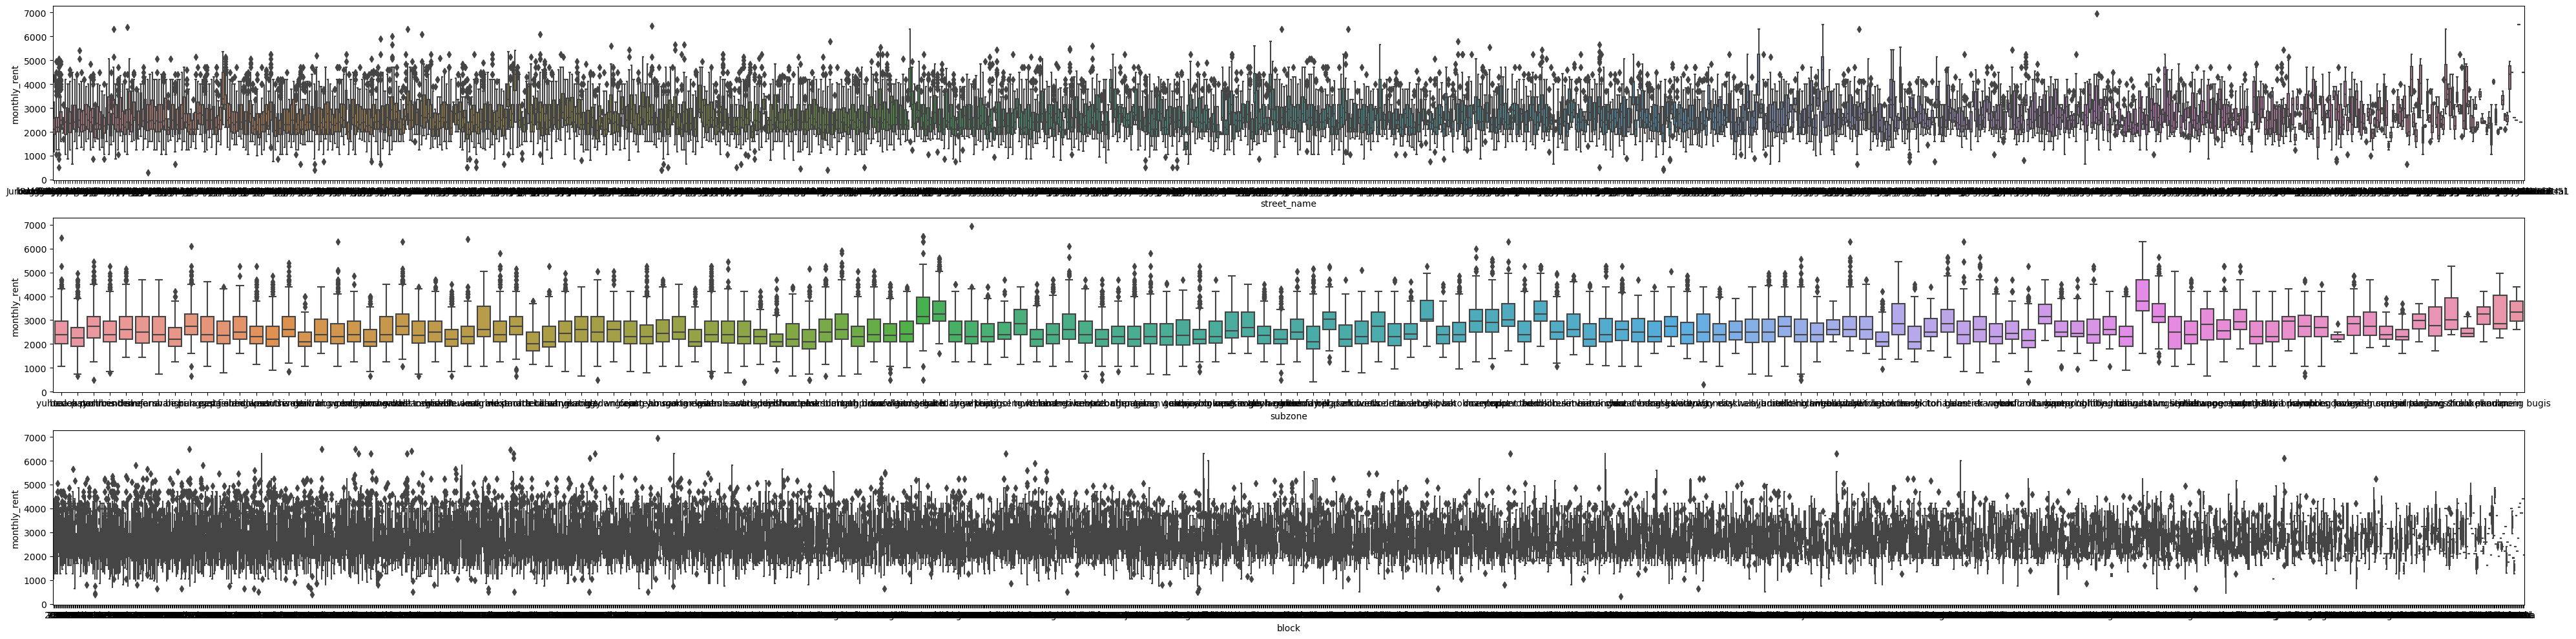

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
sns.boxplot(x='street_name', y='monthly_rent', data=df_train, ax=ax[0,])
sns.boxplot(x='subzone', y='monthly_rent', data=df_train, ax=ax[1,])
sns.boxplot(x='block', y='monthly_rent', data=df_train, ax=ax[2,])
plt.tight_layout()

c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



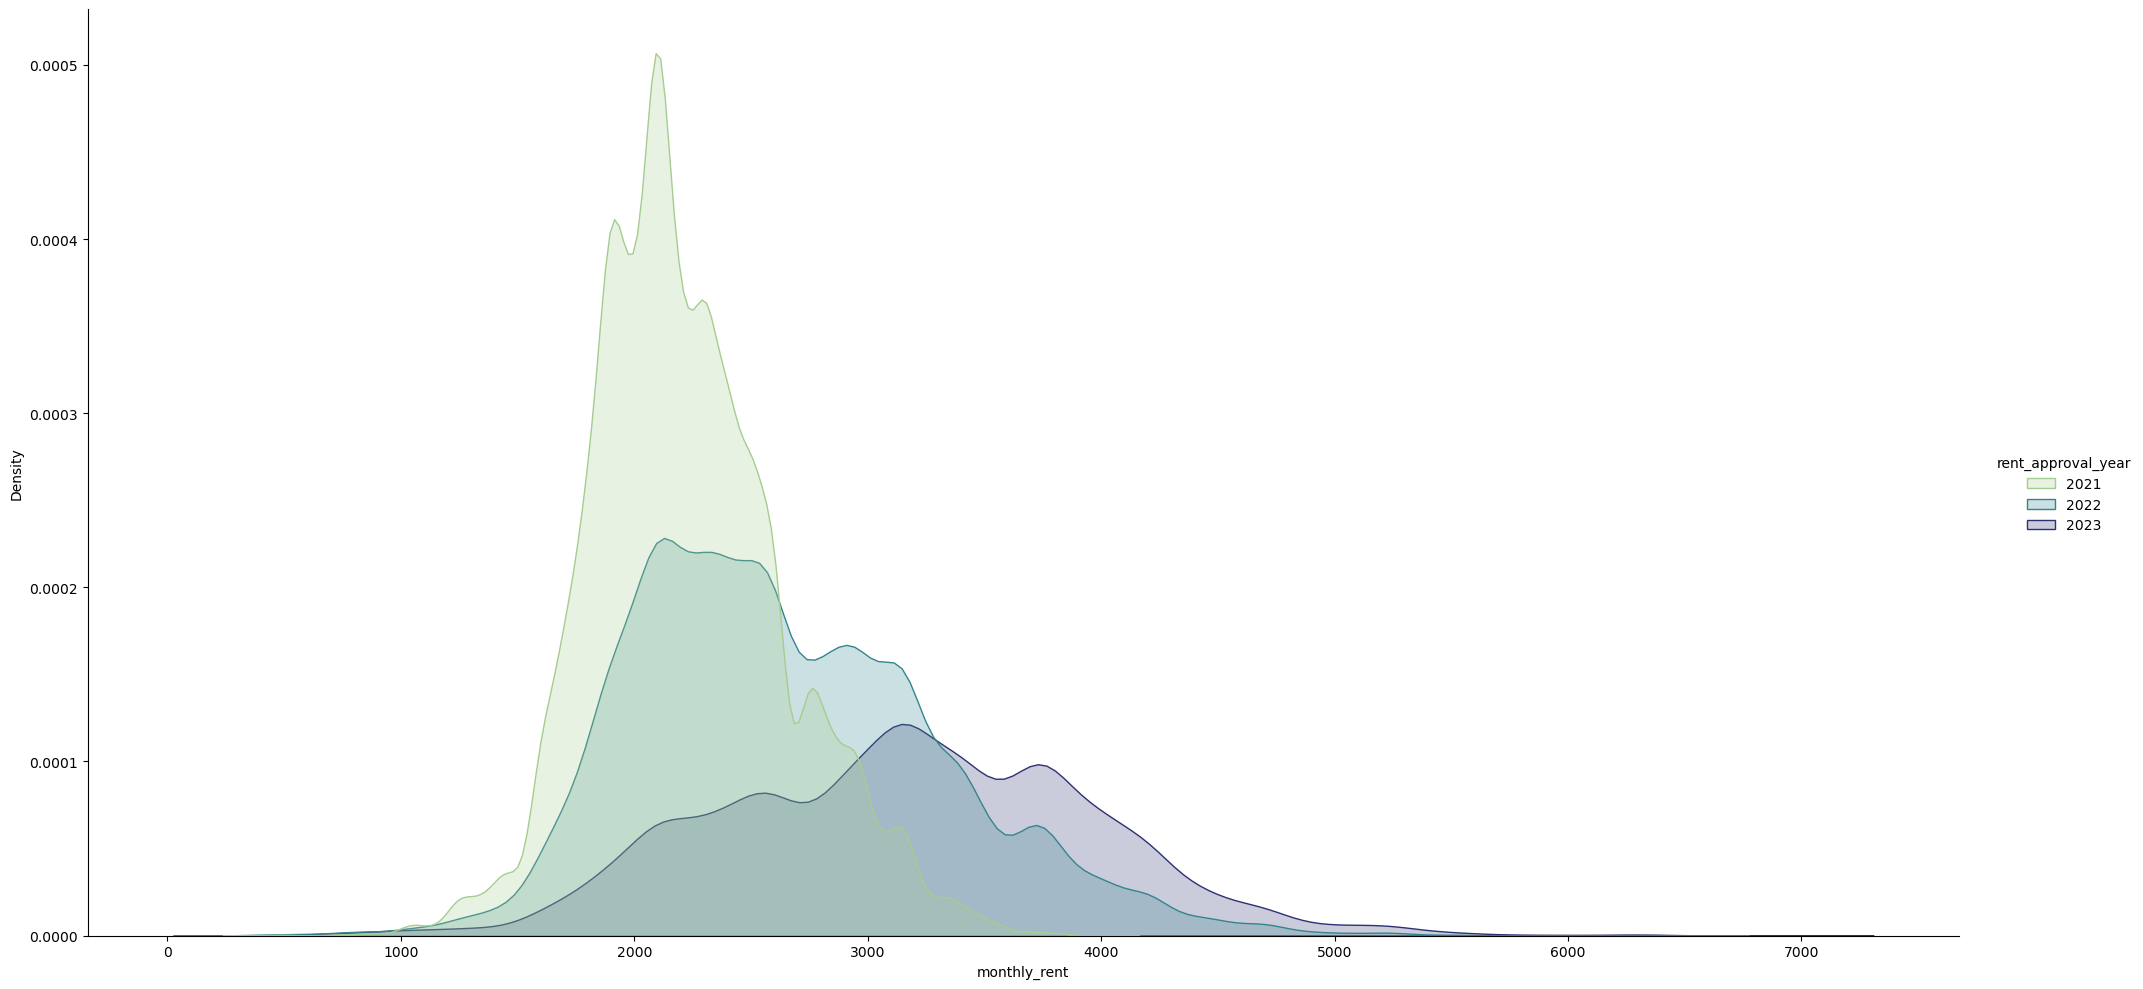

In [ ]:
#distribution of monthly rent via year
sns.displot(x='monthly_rent', data=df_train, hue='rent_approval_year', kind='kde', fill=True, palette='crest', height=10, aspect=2)


c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



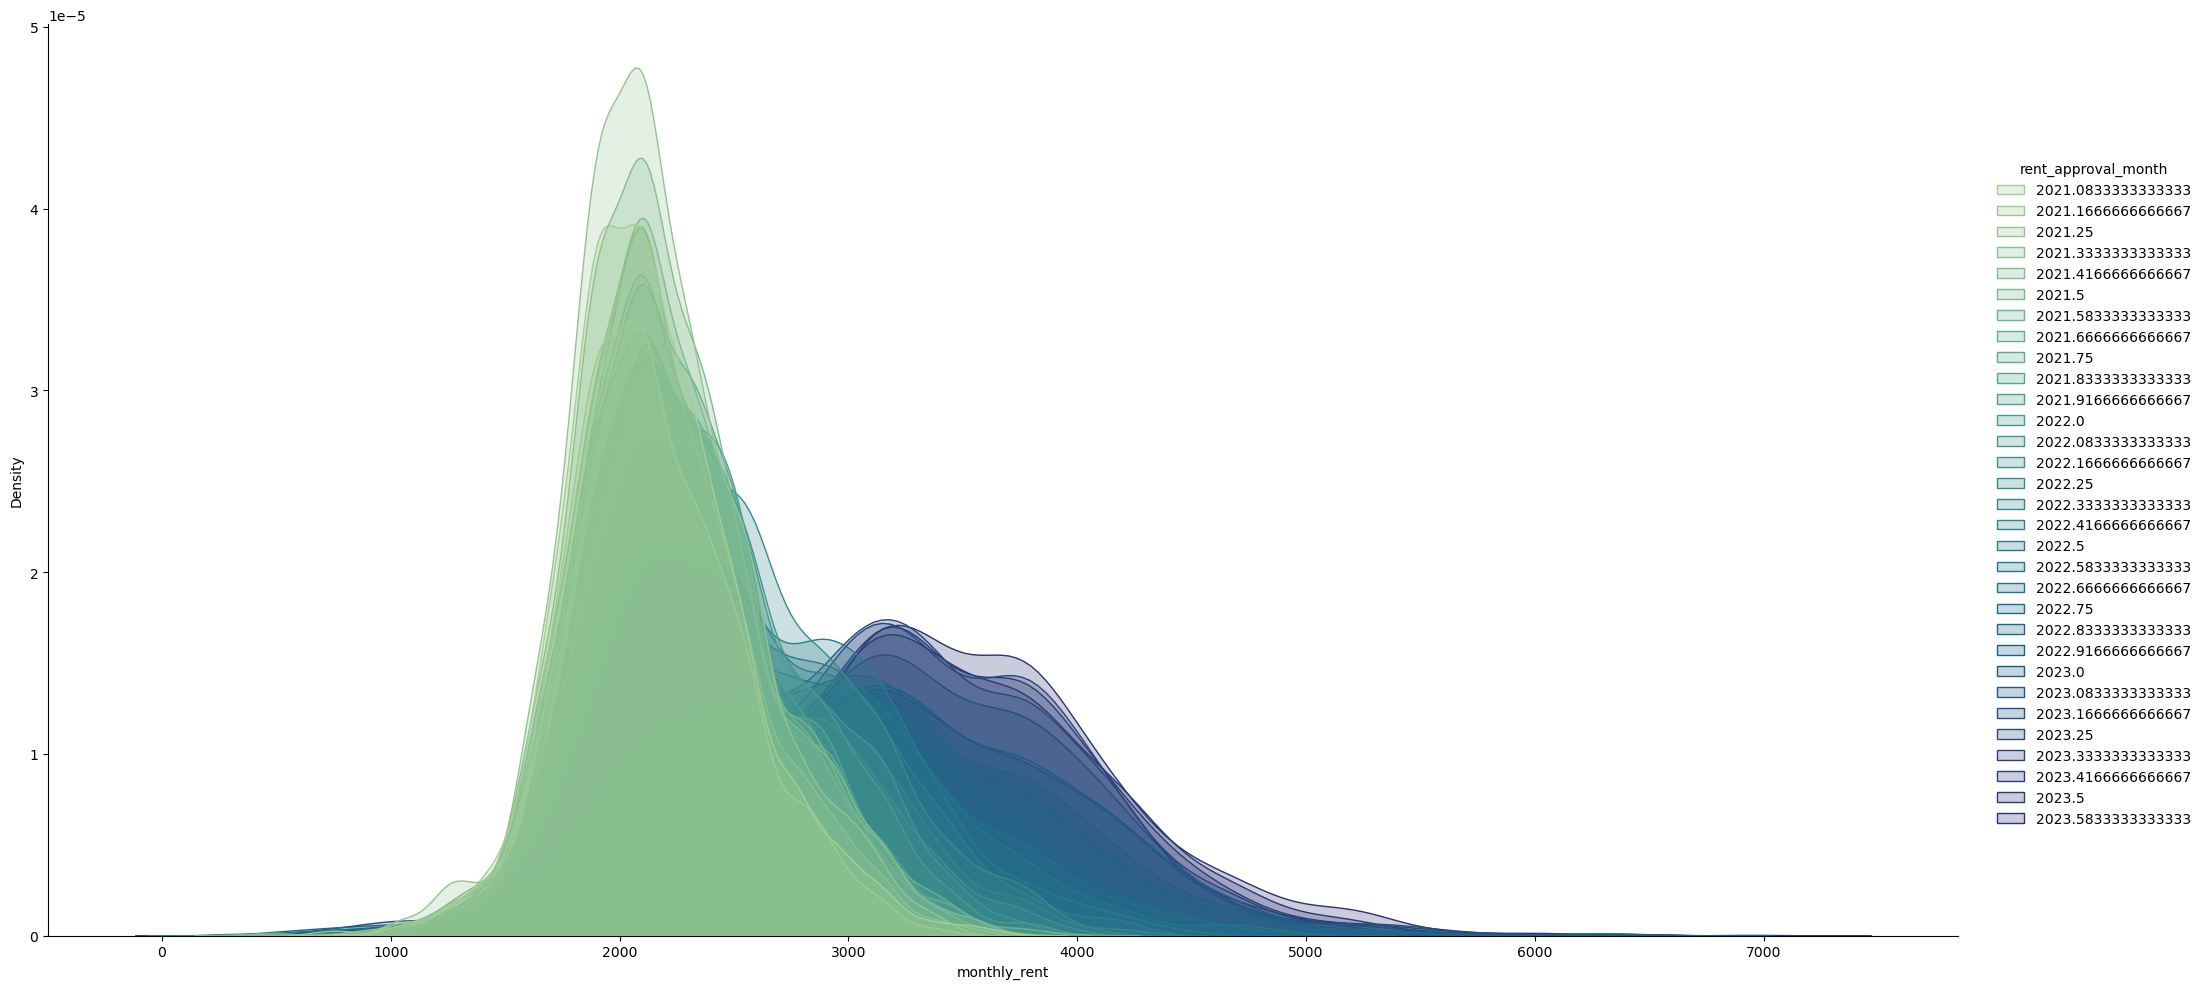

In [ ]:
#distribution of monthly rent via month
sns.displot(x='monthly_rent', data=df_train, hue='rent_approval_month', kind='kde', fill=True, palette='crest', height=10, aspect=2)


c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



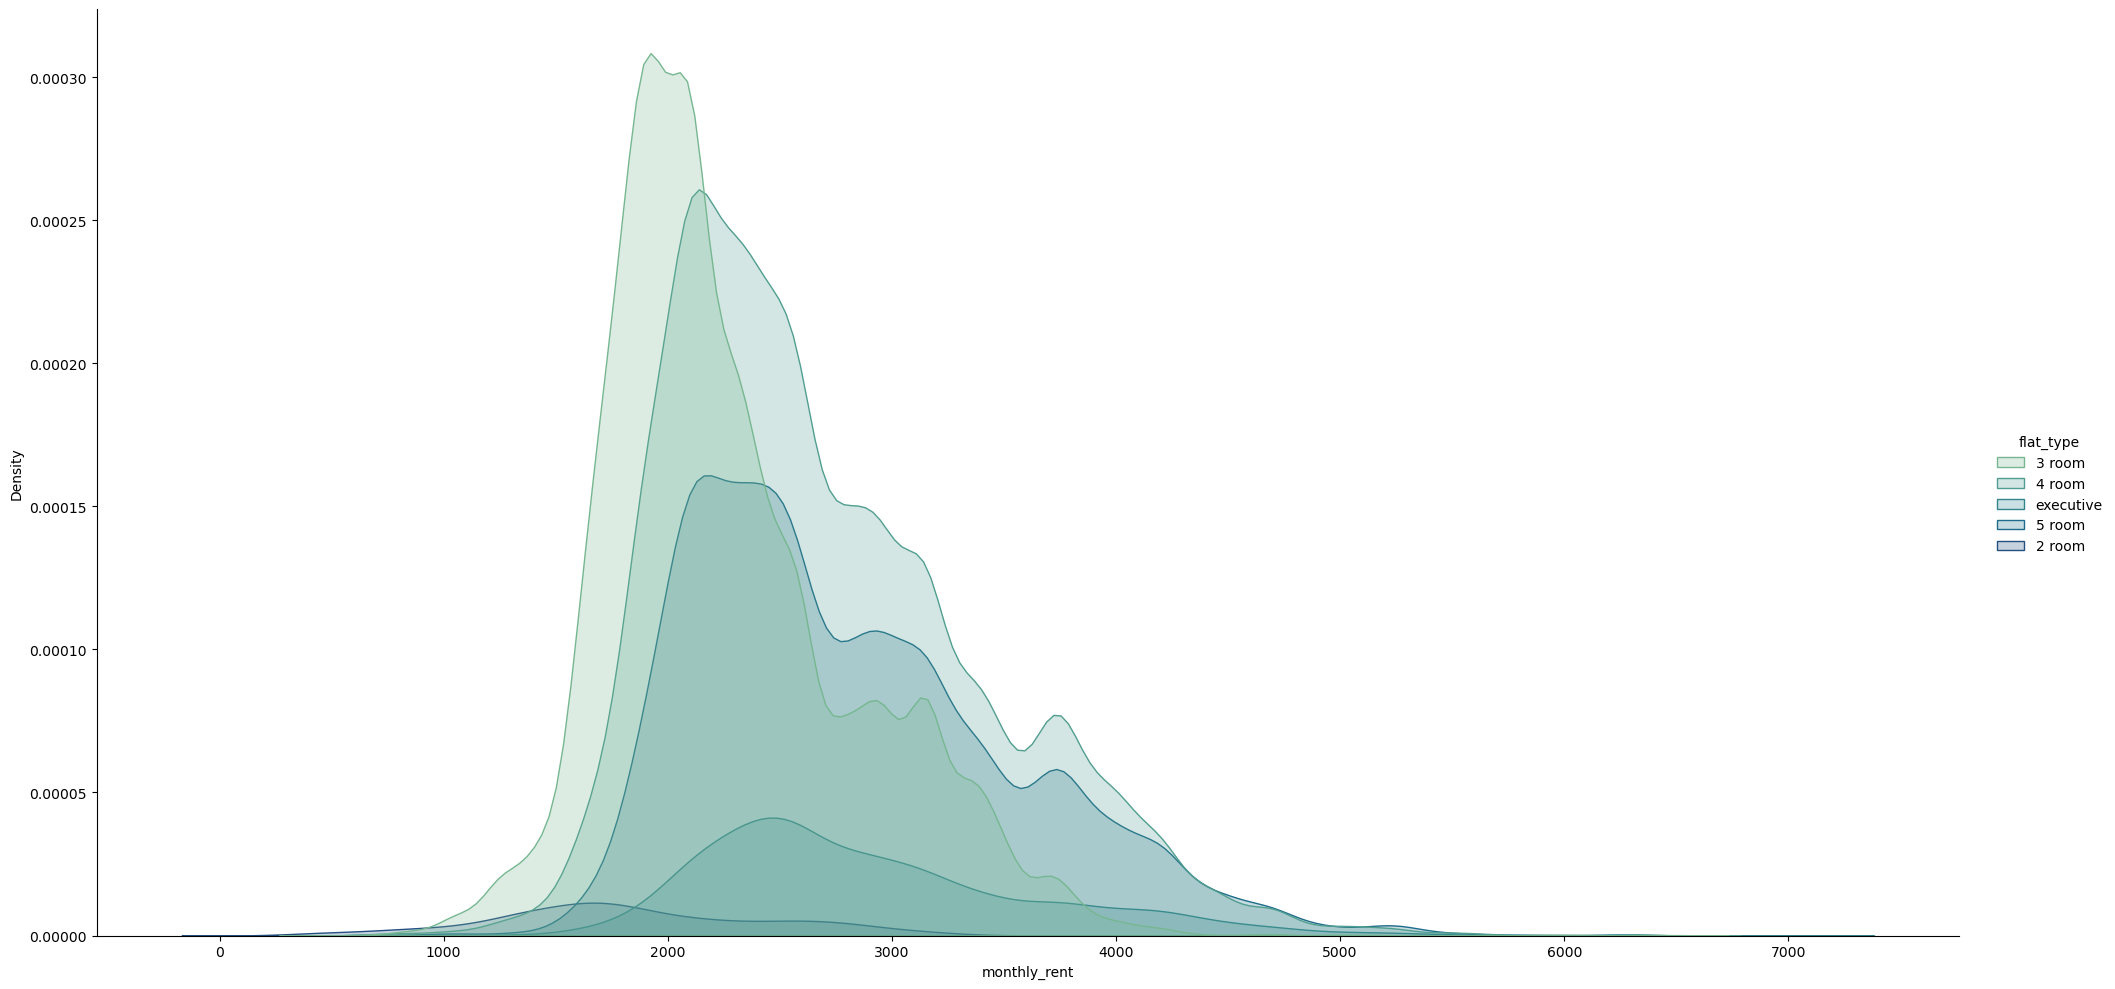

In [ ]:
#distribution of monthly rent via flat type
sns.displot(x='monthly_rent', data=df_train, hue='flat_type', kind='kde', fill=True, palette='crest', height=10, aspect=2)

c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



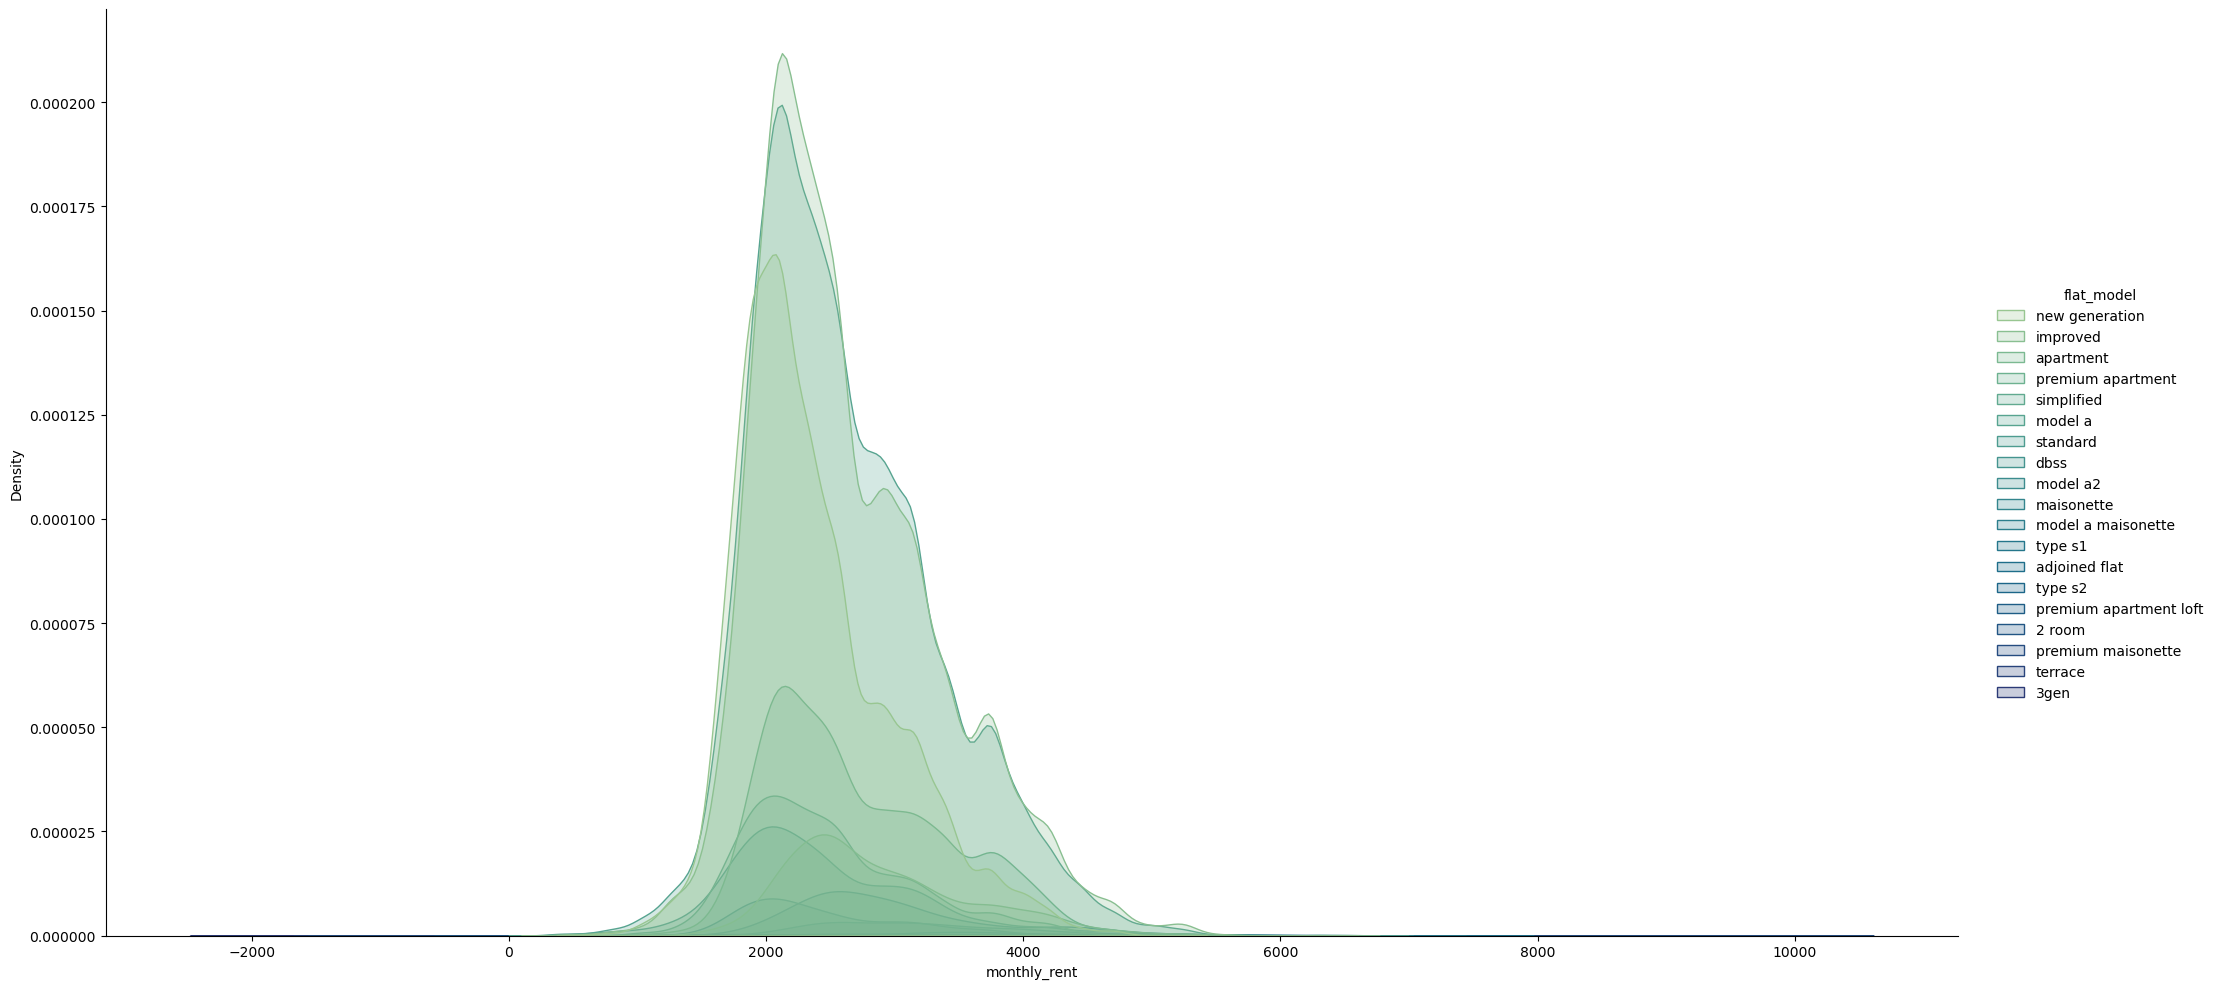

In [ ]:
#distribution of monthly rent via flat model
sns.displot(x='monthly_rent', data=df_train, hue='flat_model', kind='kde', fill=True, palette='crest', height=10, aspect=2)


c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



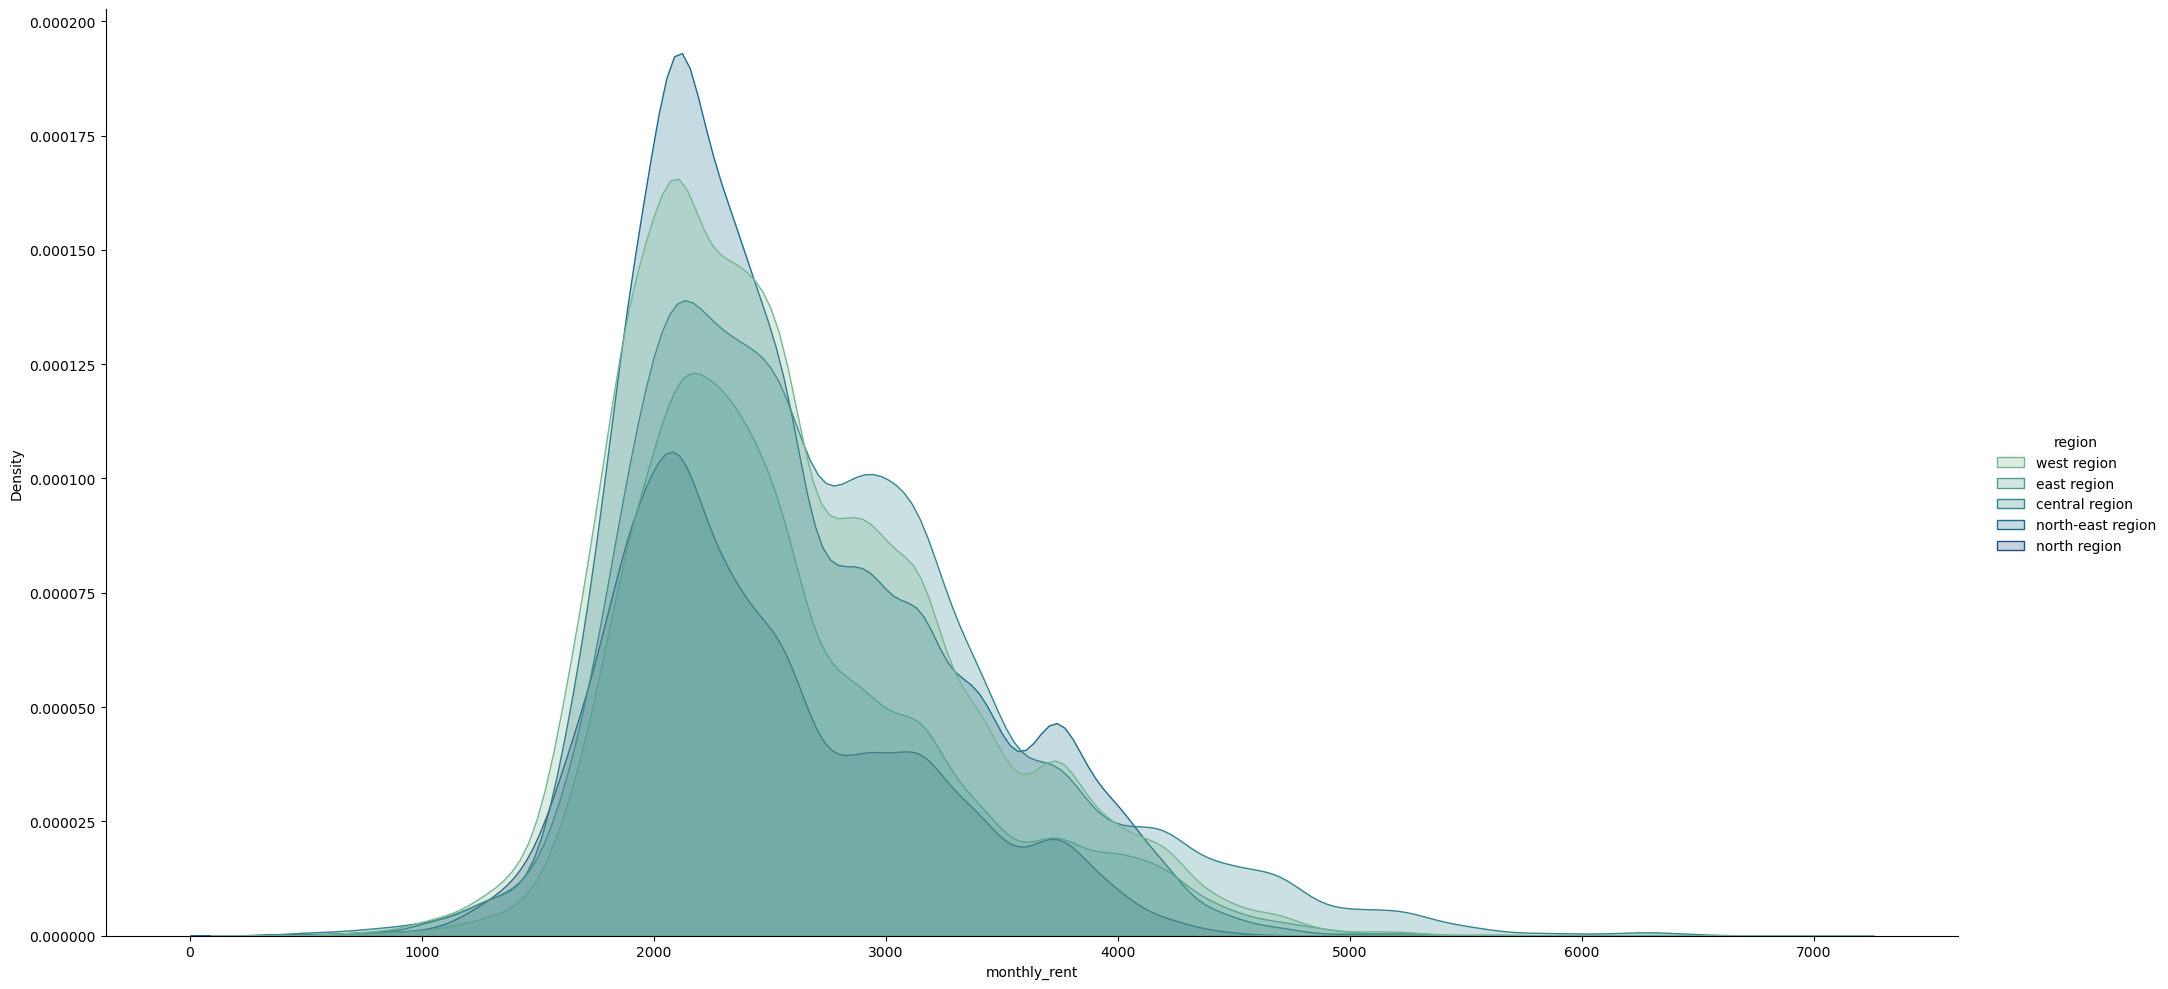

In [ ]:
#distribution of monthly rent via region
sns.displot(x='monthly_rent', data=df_train, hue='region', kind='kde', fill=True, palette='crest', height=10, aspect=2)
